# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [530]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
from sklearn.linear_model import LinearRegression

%matplotlib inline

Прочитаем исходные данные:

In [531]:
#Загрузка данных из файла csv
data = pd.read_csv('unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

In [532]:
#Вывод информации о данных
data.info()
data.isnull().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


Well       False
Por        False
Perm       False
AI         False
Brittle    False
TOC        False
VR         False
Prod       False
dtype: bool

In [533]:
data.describe()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


<AxesSubplot: xlabel='Prod', ylabel='VR'>

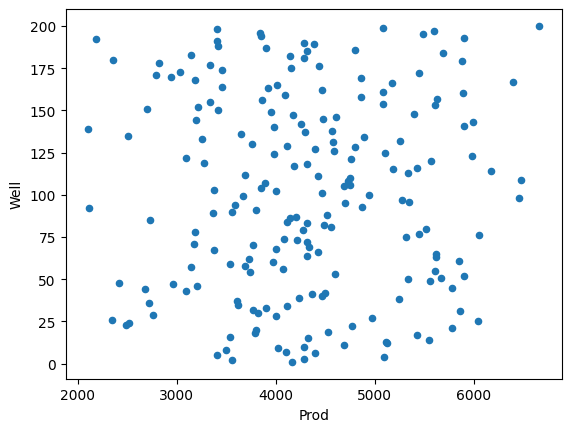

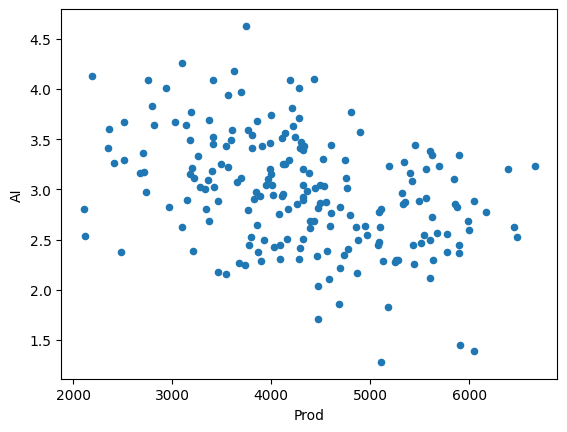

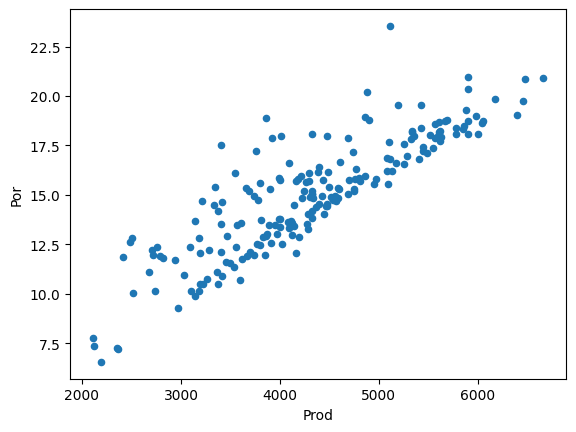

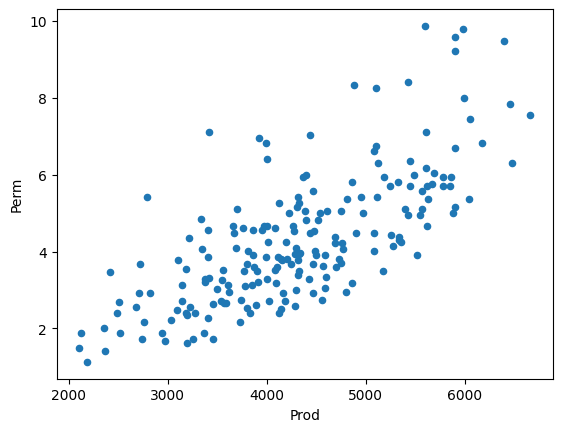

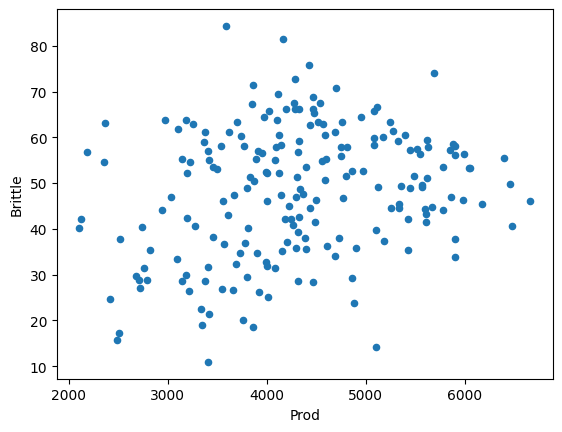

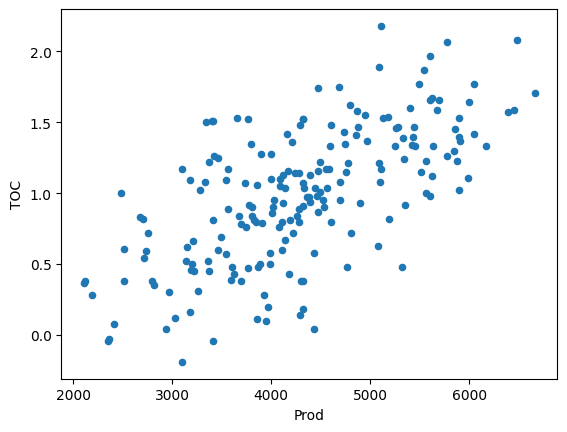

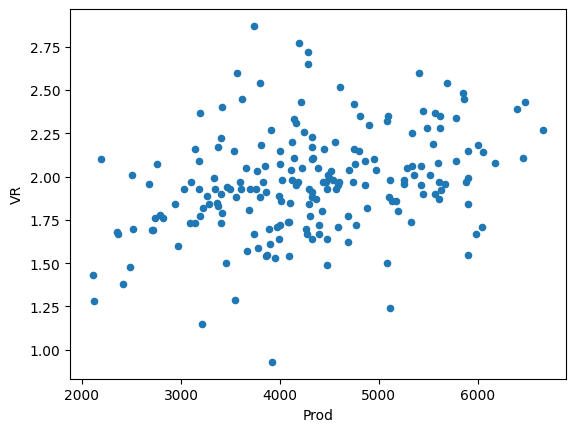

In [534]:
#Графики распредения значений в зависимости от целевой переменной
data.plot(x="Prod", y="Well", kind="scatter")
data.plot(x="Prod", y="AI", kind="scatter")
data.plot(x="Prod", y="Por", kind="scatter")
data.plot(x="Prod", y="Perm", kind="scatter")
data.plot(x="Prod", y="Brittle", kind="scatter")
data.plot(x="Prod", y="TOC", kind="scatter")
data.plot(x="Prod", y="VR", kind="scatter")

Выводы: пропуски в данных отсутствуют. На графиках зависимотси представлена зависимости.

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [535]:
#Разделим данные на все признаки и целевой
# составляем матрицу наблюдений без дополнительного столбца из единиц
A = data[['Well', 'Por', 'Perm','AI','Brittle', 'TOC','VR']]
y = data['Prod'].to_frame()

In [536]:
# стандартизируем векторы в столбцах матрицы A
A_cent = data - data.mean()
A_st = A_cent/np.linalg.norm(A_cent, axis=0)
A_st.describe().round(2)

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.00,200.00,200.00,200.00,200.00,200.00,200.00,200.00
mean,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00
std,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07
min,-0.12,-0.20,-0.13,-0.21,-0.19,-0.17,-0.24,-0.16
25%,-0.06,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05
50%,0.00,0.00,-0.01,-0.00,0.01,0.01,-0.00,-0.00
75%,0.06,0.06,0.04,0.05,0.05,0.05,0.04,0.06
max,0.12,0.20,0.23,0.21,0.18,0.18,0.21,0.17


In [537]:
#Построим матрицу корреляции
Corr_matrix = A_st.T @ A_st
Corr_matrix

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
Well,1.000000,0.068927,0.077928,0.041483,-0.079252,0.022624,-0.007279,0.026817
Por,0.068927,1.000000,0.760546,-0.461549,-0.218570,0.711831,0.111860,0.861910
Perm,0.077928,0.760546,1.000000,-0.239636,-0.124017,0.471746,0.051023,0.727426
AI,0.041483,-0.461549,-0.239636,1.000000,0.127599,-0.531864,0.499143,-0.390835
Brittle,-0.079252,-0.218570,-0.124017,0.127599,1.000000,-0.214282,0.317929,0.237155
TOC,0.022624,0.711831,0.471746,-0.531864,-0.214282,1.000000,0.299483,0.654445
VR,-0.007279,0.111860,0.051023,0.499143,0.317929,0.299483,1.000000,0.323182
Prod,0.026817,0.861910,0.727426,-0.390835,0.237155,0.654445,0.323182,1.000000


<AxesSubplot: >

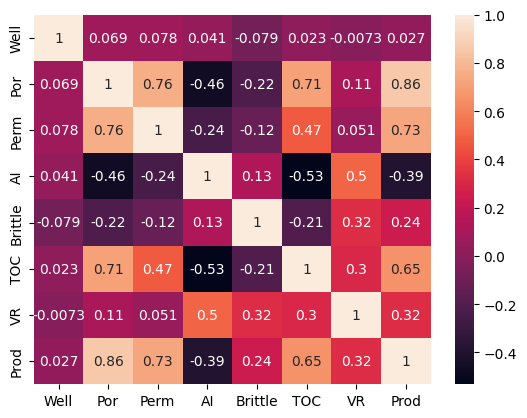

In [538]:
sns.heatmap(Corr_matrix, annot = True)

In [539]:
print('Rank:', np.linalg.matrix_rank(Corr_matrix))
print('Determinant: {:.7f}'.format(np.linalg.det(Corr_matrix)))

Rank: 8
Determinant: 0.0007299


> Признаки с высокой корреляцией Por = 0.86, Perm = 0.76, TOC = 0.71. Ранг матрицы равен 8. Детерминант 0.0007299. Матрица плохо обусловлена, определитель близок к 0.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [540]:
#Создадим матрицу наблюдений и правильных ответов
X = data.drop('Prod', axis=1)
y = data['Prod']
# строим регрессию с интерсептом.
index = ['intercept']+list(X.columns)
n = X.shape[0]
#Добавляем столбец с единицами размерностью соответствующей количеству строк таблицы n
X = np.column_stack((np.ones(n), X))
# вычислим OLS-оценку для коэффициентов
w_hat = np.linalg.inv(X.T@X)@X.T@y
print(pd.Series(np.round(w_hat, 0), index=index))

intercept   -1232.0
Well            0.0
Por           230.0
Perm          116.0
AI           -365.0
Brittle        25.0
TOC           -78.0
VR            785.0
dtype: float64


> Признак Well, согласно найденным целым коэффициентам, является неинформативным и не оказывает влияния на целевую переменную. Параметры AI, TOC - оказывают обратное влияние на целевую пременную.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [541]:
x_new = np.array([1, 106, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42])
y_new = 4748.315024
y_new_pred = x_new @ w_hat
print(np.round(np.abs(y_new_pred - y_new), 0))

25.0


In [542]:
from sklearn.metrics import mean_absolute_percentage_error
y_pred = X @ w_hat
print('Result MAPE {:.1f}:'.format(mean_absolute_percentage_error(y, y_pred)*100))

Result MAPE 3.6:


Ошибка MAPE составляет 3,6%.  Абсолютная ошибка построенного прогноза для предложенной скважины 25 миллионов кубических футов в день.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

<AxesSubplot: xlabel='TOC', ylabel='Prod'>

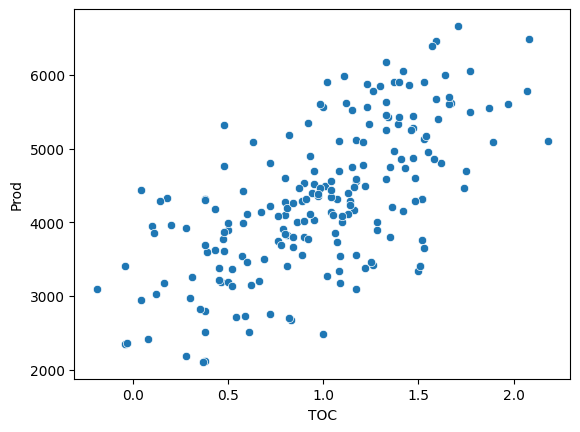

In [543]:
#Построим график зависимости признаков Prod и TOC
sns.scatterplot(x='TOC', y='Prod', data=data)

Коэффициент признака TOC равен -78. Согласно построенной модели, зависимость между процентом органического углерода и производительностью скважины обратная. Однако, согласно положительному коэффициенту корреляции между этим факторым и целевым признаком, равным 0.65 (а также согласно реальным фактам из сферы добычи газа), зависимость должна быть прямой. Из графика выше видно, что зависимость прямая и линейная. Данный результат обусловлен тем, что имеется сильная мультиколлинеарность в данных, которая «портит» коэффициенты. 

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [544]:
from sklearn.metrics import mean_absolute_percentage_error
#Исключаем из данных признаки Well, Perm, TOC и целевой признак Prod
X = data.drop(['Prod', 'Perm', 'TOC', 'Well'], axis=1)
y = data['Prod'].values
index = ['intercept']+list(X.columns)
n = X.shape[0]
X = np.column_stack((np.ones(n), X))
w_hat = np.linalg.inv(X.T@X)@X.T@y
y_pred = X @ w_hat
print(pd.Series(np.round(w_hat, 0), index=index))
print(f'MAPE: {mean_absolute_percentage_error(y, y_pred)*100:.1f}%')

intercept   -1835.0
Por           293.0
AI           -200.0
Brittle        28.0
VR            517.0
dtype: float64
MAPE: 4.0%


В очищенных от скоррелированных признаков данных получили среднюю абсолютную ошибку равную 4%, что больше ошибки по всем признакам 3,6%. Знаки корреляции сопадают с матрицей корреляции. Признаки Por,Brittle,VR имеют положительные знаки. Признак AR - имеет отрицательный знак. Знаки соответствуют корреляции из задания 5.1.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [545]:
#Строим модель линейной регрессии
lr = LinearRegression().fit(X, y)
y_pred = lr.predict(X)
print(np.around(lr.coef_, decimals=0, out=None))

[   0.  293. -200.   28.  517.]


Результат функции из библиотеки идентичен реализации выше.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [546]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [547]:
X = data.drop(['Prod', 'Perm', 'TOC', 'Well'], axis=1)
y = data['Prod'].values
# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X = scaler.fit_transform(X)
# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)
# создаём модель линейной регрессии
lr = LinearRegression()
# оцениваем качество модели на кросс-валидации, метрика — MAPE
results = cross_validate(lr, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-results['test_score'].mean() * 100))

MAPE на тренировочных фолдах: 1.77 %
MAPE на валидационных фолдах: 2.68 %


In [548]:
#Записываем данные для результирующей таблицы
result_df = pd.DataFrame({'Метод': ['LinearRegression'], 'MAPE на тренировочных фолдах %': [-results['train_score'].mean()* 100], 'MAPE на валидационных фолдах %':[-results['test_score'].mean() * 100],'Гиперпараметры':[''],'Полиномиальные признаки':['True']})

Ошибка MAPE для валидационной выборки составляет 2.68%, для тренировочной 1.77%. 

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [549]:
X = data.drop(['Prod', 'Perm', 'TOC', 'Well'], axis=1)
y = data['Prod'].values
# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X = scaler.fit_transform(X)

# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)

#np.linspace(start(от), stop(до), num=50(количество),dtype-тип данных)
param_distributions = {'alpha': list(np.linspace(0.001, 100, 1000, dtype=float))},
            
random_search = RandomizedSearchCV(
    estimator= Lasso(max_iter = 10000), 
    param_distributions=param_distributions, 
    cv=5, 
    n_iter = 10, 
    n_jobs = -1
)  

%time random_search.fit(X, y) 
print("Наилучшие значения гиперпараметров: {}".format(random_search.best_params_))
cv_results = cross_validate(random_search, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

CPU times: user 40.2 ms, sys: 3.16 ms, total: 43.4 ms
Wall time: 45.9 ms
Наилучшие значения гиперпараметров: {'alpha': 7.8087297297297305}
MAPE на тренировочных фолдах: 2.11 %
MAPE на валидационных фолдах: 2.46 %


In [550]:
result_df.loc[ len(result_df.index )] = ['Lasso', -cv_results['train_score'].mean()* 100, -cv_results['test_score'].mean() * 100, 'alpha', 'True']

Подобран параметр alpha = 7.8 с помощью RandomizedSearchCV. С помощью данного параметра удалось сократить ошибку MAPE до 2.46%.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [551]:
X = data.drop(['Prod', 'Perm', 'TOC', 'Well'], axis=1)
y = data['Prod'].values
# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X = scaler.fit_transform(X)
# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)
#Задаем список параметров регулязации
param_distributions = {'alpha': list(np.linspace(0.01, 0.1, 1000, dtype=float))},
            
random_search = RandomizedSearchCV(
    # создаём модель линейной регрессии c L2-регуляризацией
    estimator= Ridge(solver = 'svd'), 
    param_distributions=param_distributions, 
    cv=5, 
    n_iter = 10, 
    n_jobs = -1
)  

%time random_search.fit(X, y) 
print("Наилучшие значения гиперпараметров: {}".format(random_search.best_params_))
cv_results = cross_validate(random_search, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100))

CPU times: user 40.3 ms, sys: 3.21 ms, total: 43.5 ms
Wall time: 45 ms
Наилучшие значения гиперпараметров: {'alpha': 0.09693693693693695}
MAPE на тренировочных фолдах: 1.77 %
MAPE на валидационных фолдах: 2.67 %


In [552]:
result_df.loc[ len(result_df.index )] = ['Ridge', -cv_results['train_score'].mean()* 100, -cv_results['test_score'].mean() * 100, 'alpha', 'True']

С помощью RandomizedSearchCV были подобраны параметры alpha. Ошибка MAPE равна 2.67 % на валидационных фолдах и 1.77 % на тренировочных фолдах.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [553]:
# выделяем интересующие нас факторы
X = data.drop(['Prod', 'Perm', 'TOC', 'Well'], axis=1)
y = data['Prod'].values
# инициализируем стандартизатор StandardScaler
scaler = StandardScaler()
# подгоняем параметры стандартизатора (вычисляем среднее и СКО)
X = scaler.fit_transform(X)
# добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X = poly.fit_transform(X)

#Задаем список параметров регулязации
param_distributions = {'alpha': list(np.linspace(0.15, 0.2, 1000, dtype=float)),
                      'l1_ratio':list(np.linspace(0.95, 1, 1000, dtype=float))},
            
random_search = RandomizedSearchCV(
    # создаём модель линейной регрессии c L2-регуляризацией
    estimator= ElasticNet(max_iter=10000), 
    param_distributions=param_distributions, 
    cv=5, 
    n_iter = 10, 
    n_jobs = -1
)  

%time random_search.fit(X, y) 
print("Наилучшие значения гиперпараметров: {}".format(random_search.best_params_))
cv_results = cross_validate(random_search, X, y, scoring='neg_mean_absolute_percentage_error', cv=5, return_train_score=True)
print('MAPE на тренировочных фолдах: {:.2f} %'.format(-cv_results['train_score'].mean()* 100))
print('MAPE на валидационных фолдах: {:.2f} %'.format(-cv_results['test_score'].mean() * 100)) 

CPU times: user 63.4 ms, sys: 4.13 ms, total: 67.6 ms
Wall time: 79 ms
Наилучшие значения гиперпараметров: {'l1_ratio': 0.9819819819819819, 'alpha': 0.19869869869869872}
MAPE на тренировочных фолдах: 1.80 %
MAPE на валидационных фолдах: 2.72 %


In [554]:
result_df.loc[ len(result_df.index )] = ['ElasticNet', -cv_results['train_score'].mean()* 100, -cv_results['test_score'].mean() * 100, 'alpha,l1_ratio', 'True']

Подобраны значения гиперпараметров. MAPE на валидационных фолдах: 2.72 %. MAPE на тренировочных фолдах: 1.80 %.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [555]:
print(result_df)

              Метод  MAPE на тренировочных фолдах %  \
0  LinearRegression                        1.773240   
1             Lasso                        2.105344   
2             Ridge                        1.772716   
3        ElasticNet                        1.801778   

   MAPE на валидационных фолдах %  Гиперпараметры Полиномиальные признаки  
0                        2.680875                                    True  
1                        2.455790           alpha                    True  
2                        2.674685           alpha                    True  
3                        2.720215  alpha,l1_ratio                    True  


По полученным данным, самая эффективный метод по ошибке MAPE на тренировочных фолдах - Ridge, а на валидационных фолдах самый эффективный метод - Lasso. Оба метода имеют один параметр регулязации - alpha и используют полиномиальные признаки. Мною был выбран метод поиска гиперпараметров RandomizedSearchCV, в связи с чем, значения могут меняться в соответствии с изменением гиперпараметров. Однако стабильно лучший результат на представленных данных показывает модель Lasso.